In [1]:
!pip install -q scanpy anndata igraph leidenalg

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 6.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata
import igraph
import leidenalg
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
adata = sc.read_h5ad('/content/drive/MyDrive/anndata.h5ad')

In [5]:
def BasicScanpyPreprocessing(adata, n_top_genes = 2000, n_neighbors=10, n_pcs = 40, random_state = 20):
  sc.pp.normalize_total(adata, target_sum = 1e4)
  sc.pp.log1p(adata)
  sc.pp.highly_variable_genes(adata, n_top_genes = n_top_genes, flavor = 'seurat')
  #sc.pp.scale(adata, max_value=10)
  sc.tl.pca(adata, svd_solver = 'arpack')
  sc.pp.neighbors(adata, n_neighbors = n_neighbors, n_pcs = n_pcs, random_state = random_state)
  sc.tl.umap(adata, random_state = random_state)
  sc.tl.leiden(adata, random_state = random_state)
  return adata

In [6]:
adata = BasicScanpyPreprocessing(adata, n_top_genes = 2000, n_neighbors = 10, n_pcs = 40, random_state = 20)

/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
<ipython-input-5-74fc4889c969>:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, random_state = random_state)


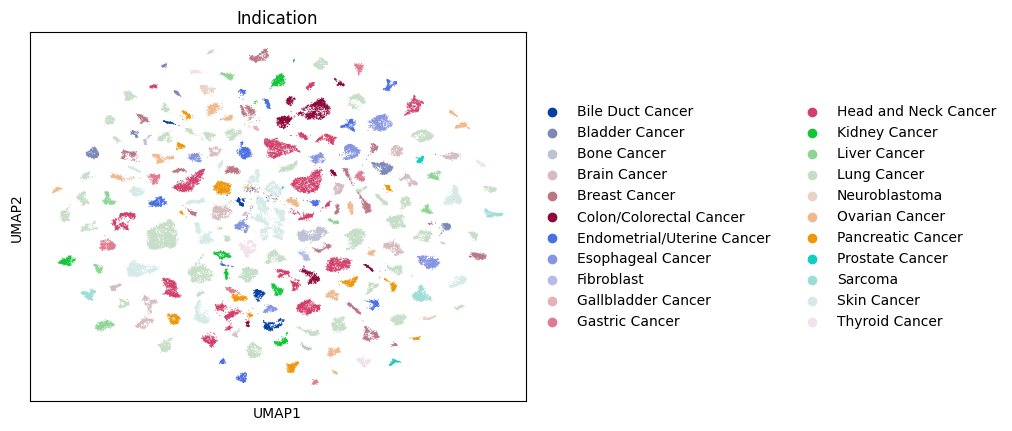

In [7]:
sc.pl.umap(adata, color = ['Indication'])